In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
'''
With collected data about patients who suffer from same illness, determine which drug is needed
    Drug A, Drug B, Drug C, Drug X, Drug Y
    
    use: age, sex, blood pressure, cholesterol levels
    
    target: drug that each patient responded to
    
'''

'\nWith collected data about patients who suffer from same illness, determine which drug is needed\n    Drug A, Drug B, Drug C, Drug X, Drug Y\n    \n    use: age, sex, blood pressure, cholesterol levels\n    \n    target: drug that each patient responded to\n    \n'

In [3]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-06-02 23:13:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2020-06-02 23:13:45 (442 MB/s) - ‘drug200.csv’ saved [6027/6027]



In [4]:
my_data = pd.read_csv("drug200.csv", delimiter=",")
my_data[0:5]


Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [5]:
'''
Pre Processing
    declare X = Feature Matrix (data of my_data) - note some are categorical which decision trees do not handle
        convert these features to numerical values using pandas.get_dummies()
    declare Y = response vector (target)
'''

X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_BP.transform(X[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
X[:,3] = le_Chol.transform(X[:,3]) 


y = my_data["Drug"]


In [6]:
'''
Setting up Decission Tree:
    Train/Test split.
        Test_size represents ratio of the testing dataset, 
        random_state ensures that we obtain the same splits
    
'''
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

print(X_trainset.shape,y_trainset.shape,X_testset.shape, y_testset.shape)

(140, 5) (140,) (60, 5) (60,)


In [7]:
'''
Modeling
    Create an instance of DecisionTreeClassifier called drugTree
        specify criterion = 'entropy' to see information gain of each node.
'''

drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [9]:
'''
Prediction:
    store into predTree
'''
predTree = drugTree.predict(X_testset)
print( predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [10]:
'''
Evaluation
    imports metrics from sklearn and check accuracy of our model.
'''

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


/Users/korashassani/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


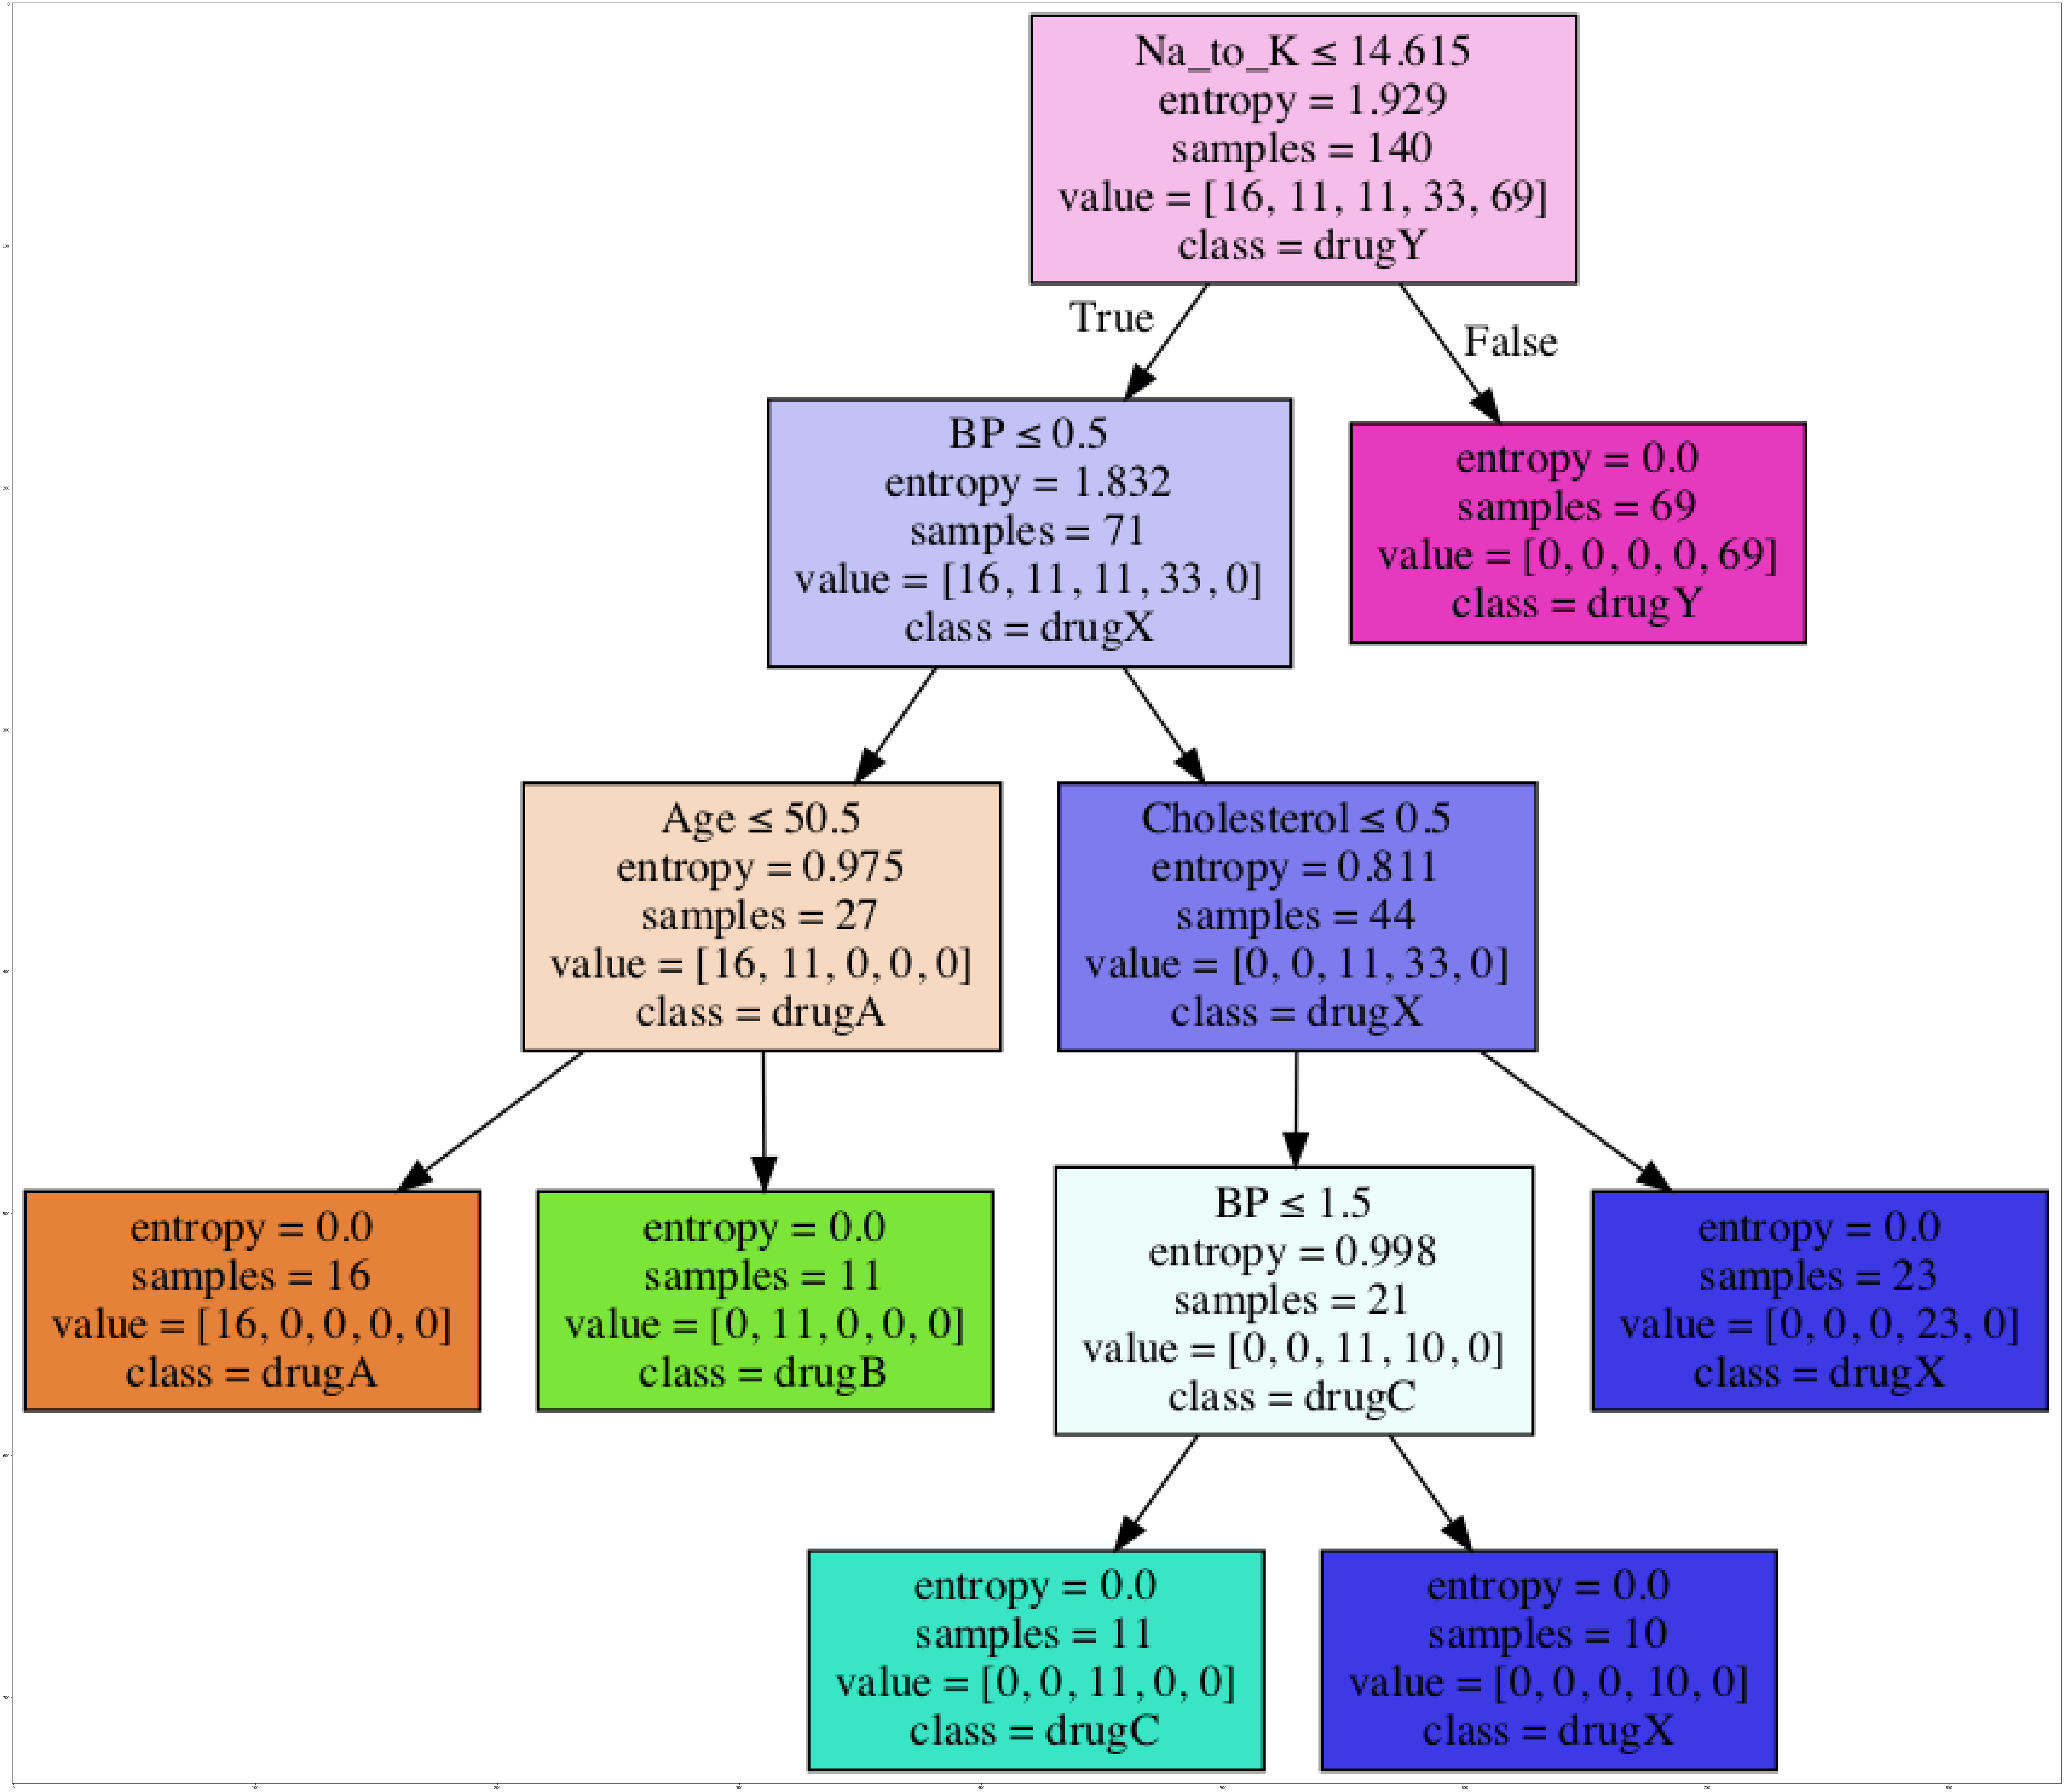

In [11]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

%matplotlib inline 
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
targetNames = my_data["Drug"].unique().tolist()
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')